<a href="https://colab.research.google.com/github/GabrieleZazzetta/project/blob/main/ProjectPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive

**Get table with features and target labels**

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the data from Google Drive
imageDataframe = pd.read_csv('/content/drive/MyDrive/BreaKHis_v1 2/histology_slides/breast/image_data.csv')
imageDataframe

Mounted at /content/drive


,path_to_image,Benign or Malignant,Cancer Type,Magnification
0,BreaKHis_v1/histology_slides/breast/benign/SOB...,Benign,Adenosis,100X
1,BreaKHis_v1/histology_slides/breast/benign/SOB...,Benign,Adenosis,100X
2,BreaKHis_v1/histology_slides/breast/benign/SOB...,Benign,Adenosis,100X
3,BreaKHis_v1/histology_slides/breast/benign/SOB...,Benign,Adenosis,100X
4,BreaKHis_v1/histology_slides/breast/benign/SOB...,Benign,Adenosis,100X
...,...,...,...,...
7904,BreaKHis_v1/histology_slides/breast/malignant/...,Malignant,Lobular Carcinoma,200X
7905,BreaKHis_v1/histology_slides/breast/malignant/...,Malignant,Lobular Carcinoma,200X
7906,BreaKHis_v1/histology_slides/breast/malignant/...,Malignant,Lobular Carcinoma,200X
7907,BreaKHis_v1/histology_slides/breast/malignant/...,Malignant,Lobular Carcinoma,200X


*Change filepath to reflect raw dataset*

In [3]:
imageDataframe['path_to_image'] = imageDataframe['path_to_image'].replace("BreaKHis_v1", "BreaKHis_v1 2", regex=True)
imageDataframe

,path_to_image,Benign or Malignant,Cancer Type,Magnification
0,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X
1,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X
2,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X
3,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X
4,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X
...,...,...,...,...
7904,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,Lobular Carcinoma,200X
7905,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,Lobular Carcinoma,200X
7906,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,Lobular Carcinoma,200X
7907,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,Lobular Carcinoma,200X


**Check for Missing Values**

In [4]:
# Check for missing values in the column Benign or Malignant
imageDataframe[imageDataframe['Benign or Malignant'].isnull()]

,path_to_image,Benign or Malignant,Cancer Type,Magnification
2871,BreaKHis_v1 2/histology_slides/breast/malignan...,NaN,NaN,NaN
3228,BreaKHis_v1 2/histology_slides/breast/malignan...,NaN,NaN,NaN
4536,BreaKHis_v1 2/histology_slides/breast/malignan...,NaN,NaN,NaN


In [5]:
# We see that all the missing values from the Benign or Malignant column are actually Malignant cancers (filename)
imageDataframe['Benign or Malignant'] = imageDataframe['Benign or Malignant'].fillna('Malignant')

In [6]:
# Check for missing values in the column Cancer Type
imageDataframe[imageDataframe['Cancer Type'].isnull()]

,path_to_image,Benign or Malignant,Cancer Type,Magnification
2871,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,NaN,NaN
3093,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,NaN,NaN
3228,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,NaN,NaN
4536,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,NaN,NaN


In [7]:
# We fill all missing values with Mucinous Carcinoma
imageDataframe['Cancer Type'] = imageDataframe['Cancer Type'].fillna('Mucinous Carcinoma')

# And the one at position 4536 is overwritten with the correct value
imageDataframe.iloc[4536, 2] = 'Ductal Carcinoma'

In [8]:
# Check where there is no magnification value
imageDataframe[imageDataframe['Magnification'].isnull()]

,path_to_image,Benign or Malignant,Cancer Type,Magnification
2871,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,Mucinous Carcinoma,NaN
3093,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,Mucinous Carcinoma,NaN
3228,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,Mucinous Carcinoma,NaN
4536,BreaKHis_v1 2/histology_slides/breast/malignan...,Malignant,Ductal Carcinoma,NaN


In [9]:
# And fill the magnification accordingly
imageDataframe.iloc[2871, 3] = '100X'
imageDataframe.iloc[3093, 3] = '200X'
imageDataframe.iloc[3228, 3] = '400X'
imageDataframe.iloc[4536, 3] = '40X'

In [10]:
# Encode the column of the tumor class - binary => LabelEncoder
classEncoder = LabelEncoder()
imageDataframe['Benign or Malignant'] = classEncoder.fit_transform(imageDataframe['Benign or Malignant'])

# Encode the column of the tumor subclass - multi-class => OneHotEncoder
subClassEncoder= OneHotEncoder(sparse_output = False)
imageDataframe[subClassEncoder.get_feature_names_out(['Cancer Type'])] = subClassEncoder.fit_transform(imageDataframe[['Cancer Type']])

# Should we drop Magnification column???????????????????????????????????????????????
imageDataframe.drop(columns=['Cancer Type', 'Magnification'], inplace = True)

imageDataframe

,path_to_image,Benign or Malignant,Cancer Type_Adenosis,Cancer Type_Ductal Carcinoma,Cancer Type_Fibroadenoma,Cancer Type_Lobular Carcinoma,Cancer Type_Mucinous Carcinoma,Cancer Type_Papillary Carcinoma,Cancer Type_Phyllodes Tumor,Cancer Type_Tubular Adenoma
0,BreaKHis_v1 2/histology_slides/breast/benign/S...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BreaKHis_v1 2/histology_slides/breast/benign/S...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BreaKHis_v1 2/histology_slides/breast/benign/S...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BreaKHis_v1 2/histology_slides/breast/benign/S...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BreaKHis_v1 2/histology_slides/breast/benign/S...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7904,BreaKHis_v1 2/histology_slides/breast/malignan...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7905,BreaKHis_v1 2/histology_slides/breast/malignan...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7906,BreaKHis_v1 2/histology_slides/breast/malignan...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7907,BreaKHis_v1 2/histology_slides/breast/malignan...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
# Train-test split
X = imageDataframe.iloc[:, :1]
y_binary = imageDataframe.iloc[:, 1:2]
y_multi = imageDataframe.iloc[:, 2:]

# Train-test split with stratification due to class imbalance
X_train_text, X_test_text, y_binary_train, y_binary_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify = y_binary)

In [12]:
import os
from PIL import Image
import pandas as pd

# Output folders
os.makedirs('/content/drive/MyDrive/binaryProcessedDataset/Train/Benign', exist_ok=True)
os.makedirs('/content/drive/MyDrive/binaryProcessedDataset/Train/Malignant', exist_ok=True)
os.makedirs('/content/drive/MyDrive/binaryProcessedDataset/Test/Benign', exist_ok=True)
os.makedirs('/content/drive/MyDrive/binaryProcessedDataset/Test/Malignant', exist_ok=True)

targetScale = (256, 256)
targetFolder = '/content/drive/MyDrive/binaryProcessedDataset'

def scaleDownImagesBinary(df):
    for index, row in df.iterrows():
        # Percorso dell'immagine
        imageFilePath = os.path.join("/content/drive/MyDrive", row['path_to_image'])

        print(f"Trying to load image: {imageFilePath}")  # Debug: verifica il percorso

        try:
            # Verifica se il file esiste prima di aprirlo
            if not os.path.exists(imageFilePath):
                print(f"File not found: {imageFilePath}")
                continue

            # Carica e ridimensiona l'immagine
            img = Image.open(imageFilePath)
            img = img.resize(targetScale)

            # Determina se l'immagine appartiene al set di addestramento o di test
            trainOrTest = 'Train' if row['path_to_image'] in X_train_text['path_to_image'].values else 'Test'
            className = 'Benign' if row['Benign or Malignant'] == 0 else 'Malignant'
            imageFileName = os.path.basename(imageFilePath)

            # Salva l'immagine ridimensionata nella cartella corretta
            output_path = os.path.join(targetFolder, trainOrTest, className, imageFileName)
            print(f"Saving resized image to: {output_path}")  # Debug: verifica percorso di salvataggio

            img.save(output_path)

        except Exception as e:
            print(f"Error processing image {imageFilePath}: {e}")

# Esegui la funzione con il dataframe delle immagini
scaleDownImagesBinary(imageDataframe)


Output streaming troncato alle ultime 5000 righe.
Trying to load image: /content/drive/MyDrive/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-4364/200X/SOB_M_DC-14-4364-200-005.png
Saving resized image to: /content/drive/MyDrive/binaryProcessedDataset/Train/Malignant/SOB_M_DC-14-4364-200-005.png
Trying to load image: /content/drive/MyDrive/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-4364/200X/SOB_M_DC-14-4364-200-011.png
Saving resized image to: /content/drive/MyDrive/binaryProcessedDataset/Train/Malignant/SOB_M_DC-14-4364-200-011.png
Trying to load image: /content/drive/MyDrive/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-4364/200X/SOB_M_DC-14-4364-200-010.png
Saving resized image to: /content/drive/MyDrive/binaryProcessedDataset/Train/Malignant/SOB_M_DC-14-4364-200-010.png
Trying to load image: /content/drive/MyDrive/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/ductal_car

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with augmentations
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Testing/validation data generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

trainDir = '/content/drive/MyDrive/binaryProcessedDataset/Train/'
testDir = '/content/drive/MyDrive/binaryProcessedDataset/Test/'

# Training data generator
train_generator = train_datagen.flow_from_directory(
    trainDir,
    batch_size=128,
    class_mode='binary'
)

# Testing data generator
test_generator = test_datagen.flow_from_directory(
    testDir,
    batch_size=128,
    class_mode='binary'
)

Found 6327 images belonging to 2 classes.
Found 1582 images belonging to 2 classes.


**Creating and Evaluating the Binary Model**

In [17]:
# Create model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model,Sequential
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(
    train_generator,
    validation_data = test_generator,
    epochs=1,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 3255s 66s/step - accuracy: 0.5917 - loss: 5.7645 - val_accuracy: 0.6895 - val_loss: 0.5333


*Evaluate the binary classification model performance*

13/13 ━━━━━━━━━━━━━━━━━━━━ 204s 15s/step


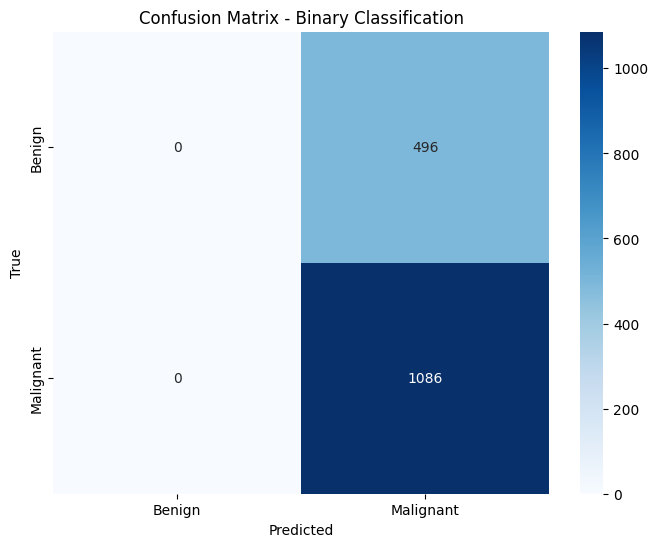

              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00       496
   Malignant       0.69      1.00      0.81      1086

    accuracy                           0.69      1582
   macro avg       0.34      0.50      0.41      1582
weighted avg       0.47      0.69      0.56      1582



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

# True labels
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Binary Classification")
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

**Expand to Multiclass Classification**

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator_mc = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/binaryProcessedDataset/Train/',
    target_size=(256, 256),
    batch_size=128,
    class_mode='categorical'
)

test_generator_mc = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/binaryProcessedDataset/Test/',
    target_size=(256, 256),
    batch_size=128,
    class_mode='categorical'
)

NameError: name 'ImageDataGenerator' is not defined

**Create a New CNN Model for Multiclass**

In [1]:
num_classes = train_generator_mc.num_classes
model_mc = Sequential()
model_mc.add(Conv2D(32, (4, 4), activation='relu', input_shape=(256, 256, 3)))
model_mc.add(Conv2D(64, (4, 4), activation='relu'))
model_mc.add(MaxPooling2D((2, 2)))
model_mc.add(Flatten())
model_mc.add(Dense(128, activation='relu'))
model_mc.add(Dropout(0.3))
model_mc.add(Dense(num_classes, activation='softmax'))

model_mc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_mc.fit(
    train_generator_mc,
    validation_data=test_generator_mc,
    epochs=10,
    steps_per_epoch=train_generator_mc.samples // train_generator_mc.batch_size,
    validation_steps=test_generator_mc.samples // test_generator_mc.batch_size
)

NameError: name 'train_generator_mc' is not defined

**Evaluate the Multiclass Model**

In [ ]:
# Get predictions
y_pred_mc = np.argmax(model_mc.predict(test_generator_mc), axis=1)

# True labels
y_true_mc = test_generator_mc.classes

# Confusion matrix
cm_mc = confusion_matrix(y_true_mc, y_pred_mc)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mc, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator_mc.class_indices.keys(), yticklabels=test_generator_mc.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Multiclass Classification")
plt.show()

# Classification report
print(classification_report(y_true_mc, y_pred_mc, target_names=test_generator_mc.class_indices.keys()))

**Save and Load the Model to avoid retraining every time**

In [ ]:
# Save the binary model
model.save('binary_model.h5')

# Save the multi-class model
model_mc.save('multiclass_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load binary model
binary_model = load_model('binary_model.h5')

# Load multi-class model
multiclass_model = load_model('multiclass_model.h5')
